In [ ]:
# PACOTES NECESSÁRIOS
# pipenv install scikit-learn scipy pandas matplotlib statsmodels fastapi uvicorn 
# pydantic pingouin seaborn ipykernel

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


### **Carga dos Dados**

In [2]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [4]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [7]:
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### **EDA (Análise Exploratória de Dados)**

In [8]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


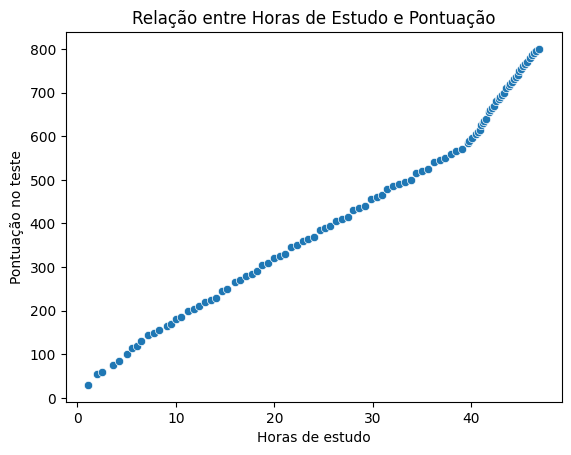

In [ ]:
# Plot de Dispersão
# X = horas_estudo
# Y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')
plt.title("Relação entre Horas de Estudo e Pontuação")
plt.xlabel("Horas de estudo")
plt.ylabel("Pontuação no teste")
plt.show()

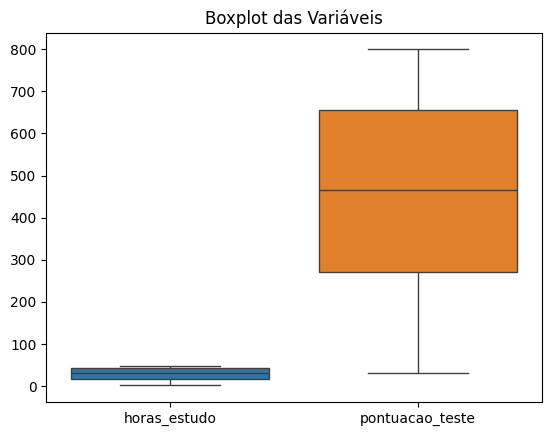

In [ ]:
# Verificar outliers
sns.boxplot(data=df_pontuacao)
plt.title("Boxplot das Variáveis")
plt.show()

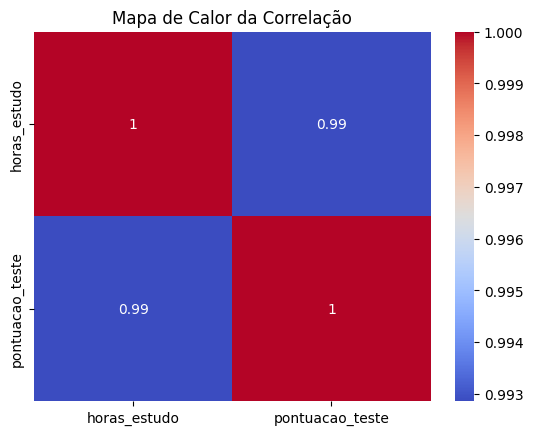

In [ ]:
# Verificar a correlação entre as variáveis
sns.heatmap(df_pontuacao.corr('pearson'), annot=True, cmap='coolwarm')
plt.title("Mapa de Calor da Correlação")
plt.show()

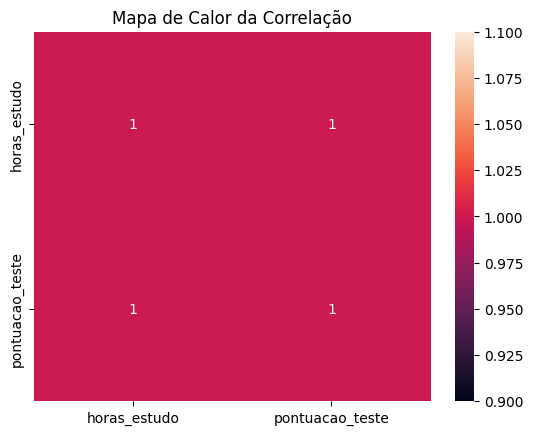

In [ ]:
# Verificar a correlação entre as variáveis
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)
plt.title("Mapa de Calor da Correlação")
plt.show()

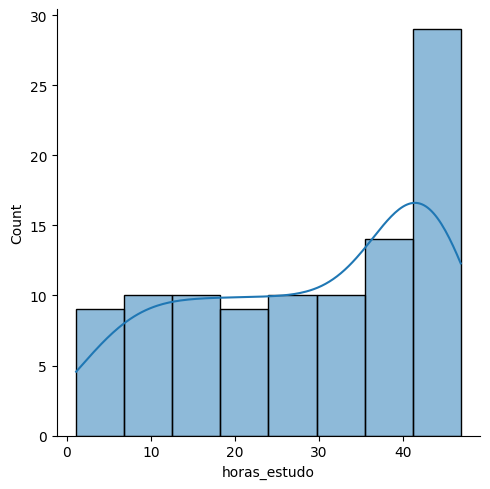

In [ ]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo', kde=True)

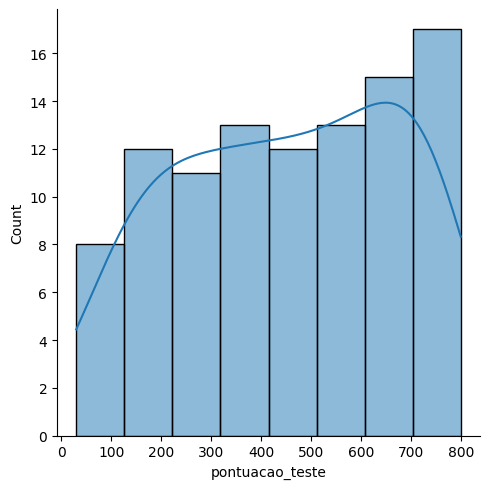

In [21]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste', kde=True)

### **Treinar Modelo**

In [23]:
# Dividir dataset em treino e teste
# Reshape - Quando temos apenas uma feature, precisamos transformar o DataFrame em um array 2D
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1) # type: ignore
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1) # type: ignore

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [ ]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [26]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Imprimir a equação da reta
# y = a*x + b
# type: ignore
coef = reg_model.coef_.flatten()[0]
intercept = reg_model.intercept_[0]

print(f"A equação da reta é y = {coef:.4f}*x + {intercept:.4f}")

A equação da reta é y = 15.6426*x + 8.4766
